<a id='BacktoTop'></a>
# Lab One: Visualization and Data Preprocessing
## MSDS 7331: Data Mining
## Dr. Drew
## Group 3: Shanqing Gu, Manisha Pednekar, Dmitry Andreev and Jonathan Knowles

*Analysis of Online News Popularity Dataset (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity): explore the statistical summaries of the features, visualize the attributes, and make conclusions from the visualizations and analysis*


## Table of Contents
1. [Business Understanding](#BusinessUnderstanding)
2. [Data Mining Type](#DataMiningType)
3. [Data Quality](#DataQuality)
4. [Simple Statistics](#SimpleStatistics)
5. [Visualize Attributes](#VisualizeAttributes)
6. [Explore Joint Relationships](#ExploreJointAttributes)
7. [Explore Attributes and Class](#ExploreAttributesandClass)
8. [New Features](#NewFeatures)
9. [Exceptional Work](#ExceptionalWork)

<a id='BusinessUnderstanding'></a>
### 01. Business Understanding (10)
[Back to top](#BacktoTop)

#### Section Objective:
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific *


##### Purpose of this data set
This Online News Popularity Dataset was acquisited from [Mashable](https://mashable.com), a popular news and opinion website that focuses on social media and technology.

The data set is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

The data consists of 39,644 records with 61 attributes that provide details and meta-data about online news articles that were published by Mashable over a two year period ranging 2013 - 2015. The goal of collecting this data was to predict the popularity of a news article. Popularity in this case is defined as the number of times that the article is shared across all social media platforms.
[might need to include a citation?]


##### Defining and measuring outcomes of this data set
Our group would like to create a classification model that can determine if an article will be popular based on the amount of times it is shared on social media. We have determined that an article can be classified as popular if it is shared X number of times. The model will have a binary output: popular / not popular.

We chose not to predict the actual number of shares that an article will have once published since that would require complex machine learning algorithms that are outside the scope of this lab assignment. In addition, if the accuracy of the prediction model is low then it could potentially provide publishers with false hope such as predicting that their article will have 1000 shares but in reality it only yields 10 shares. Whereas the binary output doesn't promise something unrealistic but simply tells the author whether the article surpasses the chosen cutoff value of X shares.

###### Why is this data important?
This data is important because it can be used to help Mashable and other online publishers understand the factors that play a part in how popular their articles are.  With a reliable model for predicting popularity Mashable will understand how they can design articles to achieve maximum popularity and exposure, which is the key objective of any publishing company.

###### How will we measure the effectiveness of our alogrithm? 
We will measure the effectiveness of our alorithm by the accuracy of its classification. We feel that a model that achieves a success rate of 73% would qualify as an effective model. This success rate is based on the study ("A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News" citation needed) carried out by K. Fernandes et al. that outlines the initial data colleciton, pre-processing, and prediction models for this data set.

<a id='DataMiningType'></a>
### 02. Data Mining Type (10)
[Back to top](#BacktoTop)

#### Section Objective:
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 

##### Raw Data Set
The code snippet below will display all of the attributes in the data set. For each attribute the:
1. Variable Name
2. Data Type
3. Scale (Min val, Mean, Median, and Max Val)
4. Variable Description are displayed in the gereated table.

##### Importing Python Libraries 

To keep this Jupyter notebook organized, we decided to import the necessary Python libraries all together at the beginning rather than doing so separately as we move through each section. The following libraries will be used for this lab assignment:

* pandas for data manipulation
* numpy for multidimensional array computing
* matplotlib.pyplot and Seaborn for data visualization
* %matplotlib inline to include plots within the notebook

In [8]:
# Import libraries which will be uses for Lab_01 project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

In [5]:
# Read csv file
df = pd.read_csv('OnlineNewsPopularity.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [9]:
#Below is a table of all of the variables in the dataset. We list the variable name, type of data, scale, and a description.

variables_description = [
[' n_tokens_title', 'ratio', 'TBD', 'Number of words in the title']
,[' n_tokens_content', 'ratio', 'TBD', 'Number of words in the content 0-8500 ']
,[' n_unique_tokens', 'ratio', 'TBD', 'Rate of unique words in the content']
,[' n_non_stop_words', 'ratio', 'TBD', 'Rate of non-stop words in the content']
,[' n_non_stop_unique_tokens', 'ratio', 'TBD', 'Rate of unique non-stop words in the content']
,[' num_hrefs', 'ratio', 'TBD', 'Number of links']
,[' num_self_hrefs', 'ratio', 'TBD', 'Number of links to other articles published by Mashable']
,[' num_imgs', 'ratio', 'TBD', 'Number of images']
,[' num_videos', 'ratio', 'TBD', 'Number of videos']
,[' average_token_length', 'ratio', 'TBD', '(Binary) Average length of the words in the content']
,[' num_keywords', 'ratio', 'TBD', '(Binary) Number of keywords in the metadata']
,[' data_channel_is_lifestyle', 'nominal', 'TBD', '(Binary) Is data channel Lifestyle?']
,[' data_channel_is_entertainment', 'nominal', 'TBD', '(Binary) Is data channel Entertainment?']
,[' data_channel_is_bus', 'nominal', 'TBD', '(Binary) Is data channel Business?']
,[' data_channel_is_socmed', 'nominal', 'TBD', '(Binary) Is data channel Social Media? ']
,[' data_channel_is_tech', 'nominal', 'TBD', '(Binary) Is data channel Tech?']
,[' data_channel_is_world', 'nominal', 'TBD', '(Binary) Is data channel World?']
,[' kw_min_min', 'ratio', 'TBD', 'Worst keyword (min. shares)']
,[' kw_max_min', 'ratio', 'TBD', 'Worst keyword (max. shares)']
,[' kw_avg_min', 'ratio', 'TBD', 'Worst keyword (avg. shares)']
,[' kw_min_max', 'ratio', 'TBD', 'Best keyword (min. shares)']
,[' kw_max_max', 'ratio', 'TBD', 'Best keyword (max. shares)']
,[' kw_avg_max', 'ratio', 'TBD', 'Best keyword (avg. shares)']
,[' kw_min_avg', 'ratio', 'TBD', 'Avg. keyword (min. shares)']
,[' kw_max_avg', 'ratio', 'TBD', 'Avg. keyword (max. shares)']
,[' kw_avg_avg', 'ratio', 'TBD', 'Avg. keyword (avg. shares)']
,[' self_reference_min_shares', 'ratio', 'TBD', 'Min. shares of referenced articles in Mashable']
,[' self_reference_max_shares', 'ratio', 'TBD', 'Max. shares of referenced articles in Mashable']
,[' self_reference_avg_sharess', 'ratio', 'TBD', 'Error or the Zillow model response variable']
,[' weekday_is_monday', 'nominal', 'TBD', '(Binary) Was the article published on a Monday? ']
,[' weekday_is_tuesday', 'nominal', 'TBD', '(Binary) Was the article published on a Tuesday? ']
,[' weekday_is_wednesday', 'nominal', 'TBD', '(Binary) Was the article published on a Wednesday?']
,[' weekday_is_thursday', 'nominal', 'TBD', '(Binary) Was the article published on a Thursday?']
,[' weekday_is_friday', 'nominal', 'TBD', '(Binary) Was the article published on a Friday? ']
,[' weekday_is_saturday', 'nominal', 'TBD', '(Binary) Was the article published on a Saturday? ']
,[' weekday_is_sunday', 'nominal', 'TBD', '(Binary) Was the article published on a Sunday? ']
,[' is_weekend', 'nominal', 'TBD', '(Binary) Was the article published on the weekend?']
,[' LDA_00', 'ratio', 'TBD', 'Closeness to LDA topic 0']
,[' LDA_01', 'ratio', 'TBD', 'Closeness to LDA topic 1']
,[' LDA_02', 'ratio', 'TBD', 'Closeness to LDA topic 2']
,[' LDA_03', 'ratio', 'TBD', 'Closeness to LDA topic 3']
,[' LDA_04', 'ratio', 'TBD', 'Closeness to LDA topic 4 ']
,[' global_subjectivity', 'ratio', 'TBD', 'Text subjectivity']
,[' global_sentiment_polarity', 'ratio', 'TBD', 'Text sentiment polarity ']
,[' global_rate_positive_words', 'ratio', 'TBD', 'Rate of positive words in the content ']
,[' global_rate_negative_words', 'ratio', 'TBD', 'Rate of negative words in the content ']
,[' rate_positive_words', 'ratio', 'TBD', 'Rate of positive words among non-neutral tokens']
,[' rate_negative_words', 'ratio', 'TBD', 'Rate of negative words among non-neutral tokens']
,[' avg_positive_polarity', 'ratio', 'TBD', 'Avg. polarity of positive words ']
,[' min_positive_polarity', 'ratio', 'TBD', 'Min. polarity of positive words ']
,[' max_positive_polarity', 'ratio', 'TBD', 'Max. polarity of positive words ']
,[' avg_negative_polarity', 'ratio', 'TBD', 'Avg. polarity of negative words']
,[' min_negative_polarity', 'ratio', 'TBD', 'Min. polarity of negative words']
,[' max_negative_polarity', 'ratio', 'TBD', 'Max. polarity of negative words']
,[' title_subjectivity', 'ratio', 'TBD', 'Title subjectivity']    
,[' title_sentiment_polarity', 'ratio', 'TBD', 'Title polarity']
,[' abs_title_subjectivity', 'ratio', 'TBD', 'Absolute subjectivity level']
,[' abs_title_sentiment_polarity', 'ratio', 'TBD', 'Absolute polarity level']
,[' shares', 'ratio', 'TBD', 'Number of shares (target)']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')
variables = variables.loc[df.columns]

def output_variables_table(variables):
    #variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Description</th></tr>']
    for vname, atts in variables.iterrows():
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = df[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d, %d, %d)' % (df[vname].min(), df[vname].mean(), df[vname].median(), df[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

output_variables_table(variables)

C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


#### Cleaning and Reshaping the Data Set

Several opportunities have been identified to improve this data set for the planned classification analysis.

##### Remove attributes that cannot contibute to analysis
In the code snippet below we set the data frame to exclude the following columns:
1. url
2. time delta
As they cannot be used in a model

In [10]:
# Exclude url and timedelta columns, read from n_tokens_title

df = df.loc[:, ' n_tokens_title':]
df.head() # use df.tail() to read from the bottom

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   ...      min_positive_polarity  \
0          0.0               4.680365   ...                   0.100000   
1          0.0               4.913725   ...                   0.033333   
2          0.0               4.393365   ...                   0.100000   
3          0.0               4.404896   ...                   0.136364   
4          0.0               4.682836   ...                   0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

##### Consolidate related binary attributes into categorical attributes
###### Channel
In the code snippet below the following attributes have been consolidated into a single attribute new "Channel":
1. data_channel_is_lifestyle
2. data_channel_is_entertainment
3. data_channel_is_bus
4. data_channel_is_socmed
5. data_channel_is_tech
6. data_channel_is_world

The consolidation makes sense because the new gategorical variable will enable analysis to be performed groups by channel.

In [11]:
# Combine and make 'channel', will fix the warn contents below

Lifestyle_df=df[df[' data_channel_is_lifestyle']==1]
Lifestyle_df[' Channel']='Lifestyle'

Entertainment_df=df[df[' data_channel_is_entertainment']==1]
Entertainment_df[' Channel']='Entertainment'

Bus_df=df[df[' data_channel_is_bus']==1]
Bus_df[' Channel']='Bus'

Socmed_df=df[df[' data_channel_is_socmed']==1]
Socmed_df[' Channel']='Socmedia'

Tech_df=df[df[' data_channel_is_tech']==1]
Tech_df[' Channel']='Tech'

World_df=df[df[' data_channel_is_world']==1]
World_df[' Channel']='World'

df=pd.concat([Lifestyle_df,Entertainment_df,Bus_df,Socmed_df,Tech_df,World_df],axis=0)



C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

###### Weekday
In the code snippet below the following attributes have been consolidated into a single attribute new "weekday":
1. weekday_is_monday
2. weekday_is_tuesday
3. weekday_is_wednesday
4. weekday_is_thursday
5. weekday_is_friday
6. weekday_is_saturday
7. weekday_is_sunday

The consolidation makes sense because the new gategorical variable will enable analysis to be performed groups by weekday.

In [12]:
# Combine and make 'weekday', will fix the warn contents below

Monday_df=df[df[' weekday_is_monday']==1]
Monday_df[' weekday']='Monday'

Tuesday_df=df[df[' weekday_is_tuesday']==1]
Tuesday_df[' weekday']='Tuesday'

Wednesday_df=df[df[' weekday_is_wednesday']==1]
Wednesday_df[' weekday']='Wednesday'

Thursday_df=df[df[' weekday_is_thursday']==1]
Thursday_df[' weekday']='Thursday'

Friday_df=df[df[' weekday_is_friday']==1]
Friday_df[' weekday']='Friday'

Saturday_df=df[df[' weekday_is_saturday']==1]
Saturday_df[' weekday']='Saturday'

Sunday_df=df[df[' weekday_is_sunday']==1]
Sunday_df[' weekday']='Sunday'

df=pd.concat([Monday_df,Tuesday_df,Wednesday_df,Thursday_df,Friday_df,Saturday_df,Sunday_df],axis=0)

C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [13]:
# Check column location and prepare to drop

df.columns.get_loc(' data_channel_is_lifestyle')
df.columns.get_loc(' data_channel_is_world')
df.columns.get_loc(' weekday_is_monday')
df.columns.get_loc(' is_weekend') 

36

In [14]:
df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]]

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend'],
      dtype='object')

In [15]:
# Remove previous channel and weekly columns

df.drop(df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]], axis=1, inplace=True)

<a id='DataQuality'></a>
### 3. Data Quality
[Back to top](#BacktoTop)

#### Section Objective:
Verify data quality: 
1. Explain any missing values, duplicate data, and outliers. Are those mistakes?
    1. To verify the quality of this data set we will:
        1. [Look for the presence of null values](#CheckForNullValues)
        2. [Look for duplicated records](#CheckForDuplicateRecords)
        3. [Look for outliers](#CheckForOutliers)

<a id='CheckForNullValues'></a>
##### Checking for Null Values
[Back to data quality](#BacktoDataQuality)

To perform a check for null values in a data set the *isnull* function from the *pandas* package can be used.

As shown in the code snippet below, there are no null values in this data set. 

In [9]:
# No Missing values in this dataset
pd.isnull(df).sum()

 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
 n_non_stop_words                0
 n_non_stop_unique_tokens        0
 num_hrefs                       0
 num_self_hrefs                  0
 num_imgs                        0
 num_videos                      0
 average_token_length            0
 num_keywords                    0
 kw_min_min                      0
 kw_max_min                      0
 kw_avg_min                      0
 kw_min_max                      0
 kw_max_max                      0
 kw_avg_max                      0
 kw_min_avg                      0
 kw_max_avg                      0
 kw_avg_avg                      0
 self_reference_min_shares       0
 self_reference_max_shares       0
 self_reference_avg_sharess      0
 LDA_00                          0
 LDA_01                          0
 LDA_02                          0
 LDA_03                          0
 LDA_04                          0
 global_subjectivity

<a id='CheckForDuplicateRecords'></a>
##### Checking for Duplicate Records
[Back to data quality](#BacktoDataQuality)

To perform a check for duplicate records in a data set the *dataframe.duplicated* function from the *pandas* package can be used.

As shown in the code snippet below, there are no duplicated records in this data set. 

In [10]:
# No duplicated values in this dataset

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [ n_tokens_title,  n_tokens_content,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords,  kw_min_min,  kw_max_min,  kw_avg_min,  kw_min_max,  kw_max_max,  kw_avg_max,  kw_min_avg,  kw_max_avg,  kw_avg_avg,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess,  LDA_00,  LDA_01,  LDA_02,  LDA_03,  LDA_04,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg_positive_polarity,  min_positive_polarity,  max_positive_polarity,  avg_negative_polarity,  min_negative_polarity,  max_negative_polarity,  title_subjectivity,  title_sentiment_polarity,  abs_title_subjectivity,  abs_title_sentiment_polarity,  shares,  Channel,  weekday]
Index: []

[0 rows x 47 columns]

<a id='CheckForOutliers'></a>
##### Checking for Outliers
[Back to data quality](#BacktoDataQuality)

To perform a check for the presence of outliers in a data set the *dataframe.describe* function from the *pandas* package can be used.

To manage any impact of outliers in the data set a log transformation will be performed on continuous variable where the maximum values of a given attribute are 50% greater than the mean value of that attribute, this approach is preferrable to removing any rows altogether.

The code in the snippet below will indicate which attributes can be benefit from a log transformation. 
* For attributes that have negative values a log+2 approach was applied to the attributes that have a min value of -1.  

In [11]:
# Outliers will be handled by log transformation due to the sample numbers are more than 30k
# Find which variables need to do log transform 

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1)
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0)

df_T["scale"] = ""

df_T.loc[df_T["log"],"scale"] = "log"
df_T.loc[df_T["log+2"],"scale"] = "log+2"

df_T[["mean", "min", "50%", "max", "scale"]]

mean       min            50%  \
 n_tokens_title                    10.416204  2.000000      10.000000   
 n_tokens_content                 585.438317  0.000000     447.000000   
 n_unique_tokens                    0.549702  0.000000       0.532596   
 n_non_stop_words                   1.015010  0.000000       1.000000   
 n_non_stop_unique_tokens           0.699134  0.000000       0.690411   
 num_hrefs                         10.380603  0.000000       7.000000   
 num_self_hrefs                     3.368517  0.000000       3.000000   
 num_imgs                           3.959445  0.000000       1.000000   
 num_videos                         0.998448  0.000000       0.000000   
 average_token_length               4.607736  0.000000       4.669471   
 num_keywords                       7.177798  1.000000       7.000000   
 kw_min_min                        25.539421 -1.000000      -1.000000   
 kw_max_min                      1114.712389  0.000000     656.000000   
 kw_avg_min                       309.083875 -1.000000     237.316667   
 kw_min_max                     12207.393972  0.000000    1300.000000   
 kw_max_max                    753337.156073  0.000000  843300.000000   
 kw_avg_max                    241773.119564  0.000000  228286.666666   
 kw_min_avg                      1031.643292 -1.000000     956.466667   
 kw_max_avg                      5161.325150  0.000000    4044.559329   
 kw_avg_avg                      2890.423023  0.000000    2737.047950   
 self_reference_min_shares       3565.717849  0.000000    1100.000000   
 self_reference_max_shares       9594.667448  0.000000    2700.000000   
 self_reference_avg_sharess      5820.979727  0.000000    2100.000000   
 LDA_00                             0.207364  0.000000       0.040000   
 LDA_01                             0.141303  0.000000       0.033339   
 LDA_02                             0.245294  0.000000       0.050001   
 LDA_03                             0.140653  0.000000       0.033373   
 LDA_04                             0.265356  0.000000       0.050763   
 global_subjectivity                0.439569  0.000000       0.447111   
 global_sentiment_polarity          0.119596 -0.377657       0.119719   
 global_rate_positive_words         0.039891  0.000000       0.039164   
 global_rate_negative_words         0.016320  0.000000       0.015209   
 rate_positive_words                0.695364  0.000000       0.714286   
 rate_negative_words                0.288462  0.000000       0.277778   
 avg_positive_polarity              0.351704  0.000000       0.354545   
 min_positive_polarity              0.091221  0.000000       0.100000   
 max_positive_polarity              0.762561  0.000000       0.800000   
 avg_negative_polarity             -0.255202 -1.000000      -0.250000   
 min_negative_polarity             -0.524040 -1.000000      -0.500000   
 max_negative_polarity             -0.104041 -1.000000      -0.100000   
 title_subjectivity                 0.265740  0.000000       0.100000   
 title_sentiment_polarity           0.068661 -1.000000       0.000000   
 abs_title_subjectivity             0.343692  0.000000       0.500000   
 abs_title_sentiment_polarity       0.145570  0.000000       0.000000   
 shares                          2928.637989  1.000000    1400.000000   

                                         max  scale  
 n_tokens_title                    23.000000         
 n_tokens_content                8474.000000    log  
 n_unique_tokens                  701.000000    log  
 n_non_stop_words                1042.000000    log  
 n_non_stop_unique_tokens         650.000000    log  
 num_hrefs                        304.000000    log  
 num_self_hrefs                   116.000000    log  
 num_imgs                         128.000000    log  
 num_videos                        75.000000    log  
 average_token_length               7.695652         
 num_keywords                      10.000000         
 kw_min_min                      

Now that the candidates for transformation have been identified, the code below will perform those transformations.

In [12]:
# Log transform 18 variables. 

df['log_n_tokens_content'] = np.log(df[' n_tokens_content'] + 0.1)
df['log_n_unique_tokens'] = np.log(df[' n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df[' n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df[' n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df[' num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df[' num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df[' num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df[' num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df[' kw_min_min'] + 2)
df['log_kw_max_min'] = np.log(df[' kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df[' kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df[' kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df[' kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df[' kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df[' self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df[' self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_sharess'] = np.log(df[' self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df[' shares'] + 0.1)

Now that the transformation has been performed the orignal attributes need to be dropped.


In [13]:
# find locations for untransformed

df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]]

Index([' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' shares'],
      dtype='object')

In [14]:
# Drop the above

df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]], axis=1, inplace=True)

In [15]:
# Check if everything correct so far
df.dtypes

 n_tokens_title                   float64
 average_token_length             float64
 num_keywords                     float64
 kw_max_max                       float64
 kw_avg_max                       float64
 kw_min_avg                       float64
 LDA_00                           float64
 LDA_01                           float64
 LDA_02                           float64
 LDA_03                           float64
 LDA_04                           float64
 global_subjectivity              float64
 global_sentiment_polarity        float64
 global_rate_positive_words       float64
 global_rate_negative_words       float64
 rate_positive_words              float64
 rate_negative_words              float64
 avg_positive_polarity            float64
 min_positive_polarity            float64
 max_positive_polarity            float64
 avg_negative_polarity            float64
 min_negative_polarity            float64
 max_negative_polarity            float64
 title_subjectivity               

<a id='SimpleStatistics'></a>
### 04. Simple Statistics
[Back to top](#BacktoTop)

#### Section Objective:
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. 
* Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

Considering this data set has 61 attributes, we wanted to summarize the distributions by applying the **`describe`** function. The output table below provides simple statistics for each attribute such as the mean, standard deviation, minimum, maximum, and percentile values.

In [79]:
# Quick statistic summary of the data
pd.options.display.max_columns = 45
summary = df.describe()

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     33510.000000       33510.000000      33510.000000   
mean         10.416204         585.438317          0.549702   
std           2.134557         483.838530          3.828350   
min           2.000000           0.000000          0.000000   
25%           9.000000         272.000000          0.467396   
50%          10.000000         447.000000          0.532596   
75%          12.000000         761.000000          0.600000   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       33510.000000               33510.000000  33510.000000   
mean            1.015010                   0.699134     10.380603   
std             5.688218                   3.549460     10.599809   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.628370      4.000000   
50%             1.000000                   0.690411      7.000000   
75%             1.000000                   0.752475     13.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     33510.000000  33510.000000  33510.000000           33510.000000   
mean          3.368517      3.959445      0.998448               4.607736   
std           3.883522      7.725860      3.651955               0.646702   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.490385   
50%           3.000000      1.000000      0.000000               4.669471   
75%           4.000000      3.000000      1.000000               4.852841   
max         116.000000    128.000000     75.000000               7.695652   

        num_keywords    kw_min_min     kw_max_min    kw_avg_min  \
count   33510.000000  33510.000000   33510.000000  33510.000000   
mean        7.177798     25.539421    1114.712389    309.083875   
std         1.952422     68.985113    3522.943324    607.002311   
min         1.000000     -1.000000       0.000000     -1.000000   
25%         6.000000     -1.000000     444.000000    141.025000   
50%         7.000000     -1.000000     656.000000    237.316667   
75%         9.000000      4.000000    1000.000000    360.428571   
max        10.000000    377.000000  298400.000000  42827.857143   

          kw_min_max     kw_max_max     kw_avg_max    kw_min_avg  \
count   33510.000000   33510.000000   33510.000000  33510.000000   
mean    12207.393972  753337.156073  241773.119564   1031.643292   
std     54698.026221  213034.725810  122864.851517   1067.121534   
min         0.000000       0.000000       0.000000     -1.000000   
25%         0.000000  843300.000000  165789.285715      0.000000   
50%      1300.000000  843300.000000  228286.666666    956.466667   
75%      6800.000000  843300.000000  310000.000000   1936.365694   
max    843300.000000  843300.000000  843300.000000   3610.124972   

          kw_max_avg    kw_avg_avg   self_reference_min_shares  \
count   33510.000000  33510.000000                33510.000000   
mean     5161.325150   2890.423023                 3565.717849   
std      5587.406032   1126.330419                19322.677838   
min         0.000000      0.000000                    0.000000   
25%      3504.363334   2312.970075                  620.000000   
50%      4044.559329   2737.047950                 1100.000000   
75%      5346.671878   3271.472136                 2400.000000   
max    298400.000000  43567.659946               690400.000000   

        self_reference_max_shares   self_reference_avg_sharess        LDA_00  \
count                33510.000000                 33510.000000  33510.000000   
mean                  9594.667448                  5820.979727      0.207364   
std                  39921.174733                 23681.940504      0.27

In [80]:
df.tail()

n_tokens_title   n_tokens_content   n_unique_tokens  \
39504             16.0                0.0          0.000000   
39505             15.0              447.0          0.551570   
39508             12.0              496.0          0.521368   
39515              7.0                0.0          0.000000   
39516             13.0              936.0          0.426230   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
39504                0.0                   0.000000         0.0   
39505                1.0                   0.745318         9.0   
39508                1.0                   0.577904        51.0   
39515                0.0                   0.000000         0.0   
39516                1.0                   0.595978         7.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  \
39504              0.0       16.0          1.0               0.000000   
39505              7.0        1.0          1.0               4.673378   
39508              1.0        1.0          0.0               5.481855   
39515              0.0       13.0          0.0               0.000000   
39516              0.0        6.0          0.0               5.035256   

        num_keywords   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
39504           10.0         -1.0       1100.0        172.9       9800.0   
39505            7.0         -1.0        497.0        248.0          0.0   
39508            6.0         -1.0          0.0         -1.0      14700.0   
39515            4.0         -1.0          0.0         -1.0     141400.0   
39516           10.0         -1.0       1200.0        488.3       1400.0   

        kw_max_max     kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
39504     843300.0  197190.000000  2139.012605  5462.669188  3028.126926   
39505     843300.0  240871.428571     0.000000  3877.657895  2052.565862   
39508     843300.0  378100.000000  2144.039221  3386.366230  2699.875152   
39515     843300.0  369425.000000  2144.039221  5462.669188  3337.749161   
39516     843300.0  143110.000000   920.000000  5120.000000  2487.844993   

        self_reference_min_shares   self_reference_max_shares    ...     \
39504                         0.0                         0.0    ...      
39505                       850.0                     22200.0    ...      
39508                       990.0                       990.0    ...      
39515                         0.0                         0.0    ...      
39516                         0.0                         0.0    ...      

         LDA_02    LDA_03    LDA_04   global_subjectivity  \
39504  0.667562  0.272340  0.020013              0.000000   
39505  0.742972  0.028572  0.171311              0.478096   
39508  0.601650  0.033988  0.033336              0.396181   
39515  0.549997  0.299993  0.050006              0.000000   
39516  0.456712  0.020001  0.483285              0.416567   

        global_sentiment_polarity   global_rate_positive_words  \
39504                    0.000000                     0.000000   
39505                    0.020603                     0.017897   
39508                    0.220833                     0.024194   
39515                    0.000000                     0.000000   
39516                   -0.001814                     0.020299   

        global_rate_negative_words   rate_positive_words  \
39504                     0.000000              0.000000   
39505                     0.017897              0.500000   
39508                     0.004032              0.857143   
39515                     0.000000              0.000000   
39516                     0.026709              0.431818   

        rate_negative_words   avg_positive_polarity   min_positive_polarity  \
39504              0.000000                0.000000                0.000000   
39505              0.500000                0.304025                0.033333   
39508              0.142857                0.516667         

#### Shares:
With the goal for this data set being to classify whether an article is popular based on the number of shares, it seemed logical to start with that attribute. You will have to scroll right all the way to the end of the table above to find the **shares** attribute.

First thing that stands out right away is the large range with some articles only getting 1 single share while the maximum number of shares comes in at 690,400 shares. To get a better idea where the majority of articles can be expected with respect to shares, we look at the 25% percentile with 930 shares and the 75% percentile with 2,500 shares. Clearly, this looks like a heavily right skewed distribution which is futher confirmed by the mean number of shares at 2,929 being higher than the median at 1,400 shares suggesting that the mean is being heavily influenced by outliers on the high end of the scale.

To illustrate the extent of the right skewness and the need for a log transformation to better interpret the distribution, we have included the histogram and boxplots below. This serves as a visual check for outliers that might not have been dealt with in the **Data Quality** section which in turn could improve the prediction accuracy for any classification algorithm used for this data set. 

### Need boxplot and histogram plots to show distribution of shares attribute before and after log transformation

As you look through the **`describe`** summary statistics table, you will notice there are multiple attributes that have similar labels and seem to represent the same measure. The screenshot below from a [Stanford](http://cs229.stanford.edu/proj2015/328_report.pdf) study provides an organized grouping of similar attributes by the aspect of the article that it relates to. For example, the digital media aspect of the article is described by the number of images (*num_imgs*) and videos (*num_videos*).

We decided to discuss the important summary statistics of these aspects rather than go through the individual attributes one by one.

![title](Images/Features_Summary_Table.PNG)

#### Words:

Looking at the statistics summary table, it didn't surprise us that the titles for these articles are kept short. The mean title word count is just over 10 words with a tight standard deviation of 2 words because publishers know that today's readers would easily lose interest before even opening the article just based off a long title.

Going through the body of the article, there are several specific measures of the rate and type of words used as listed in the screenshot above under the **words** section. 

The attribute that comes to mind as the most important with regards to popularity is number of words in the article (*n_tokens_content*). The mean word count in this data set is 585 which seems short enough to hold the readers' attention for the full article and have a higher chance of sharing it. However, a 2013 study conducted by [Newswhip Analytics](https://www.newswhip.com/2013/12/article-length/) showed that articles in the 500 - 800 word count had the lowest chance of social media success which is why some news websites such as [Quartz](https://qz.com/) decided not to publish articles within that range.  Considering the standard deviation of almost 484 words and max word count of 8474, there are plenty of articles that fall out of that range. Lastly, the minimum word count of 0 initially got our attention  as possible outliers but upon closer inspection we found that these articles consisted only of images and videos.

After performing an extensive search, we didn't find any literature to compare with regards to rate of non-stop words (*n_non_stop_words*), rate of unique words (*n_unique_tokens*), and rate of unique non-stop words (*n_non_stop_unique_tokens*). Thus, the simple statistics for these attributes didn't seem as pertinent to review.

#### Links:

It would seem that including a lot of links within an article would easily distract a reader but surprisingly for this data set the mean number of links per article is just over 10. Upon closer examination, the 50% percentile corresponds to 7 links per article with the maximum coming in at an enormous 304 links so there is definitely some right skewness in the distribution.

There is an attribute measuring the number of Mashable article links (*num_self_hrefs*) per article. The mean number of Mashable links comes in at 3 per article which is lower than the mean of 10 total links discussed in the paragraph above. This seems reasonable since an article that only includes Mashable links might look like a self-promotion strategy for the website and lower the article's credbility.

#### Digital Media:

The mean number of images (*num_imgs*) and videos (*num_videos*) per article is ~ 4 and 1 respectively. This seems reasonable that articles would have at least a few pictures and videos to break up large text paragraphs in an effort to hold the readers' attention. 

Looking at the minimum values, it is interesting to see that there are still articles with neither any images or videos included which we believe would not be considered popular on social media. On the other end of the spectrum, the max values of 128 images and 75 videos are pretty extreme and we would imagine most readers would not have the attention span to get through such an article in its entirety. 

#### Time, Keywords, and Natural Language Processing:

After trying to understand what the summary statistics for these aspects of the article represent, we decided that it would make more sense to visualize them in the next section since that would be easier to interpret.

<a id='VisualizeAttributes'></a>
### 05. Visualize Attributes (15)
[Back to top](#BacktoTop)

#### Section Objective:
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26aa0a90>,
      dtype=object)

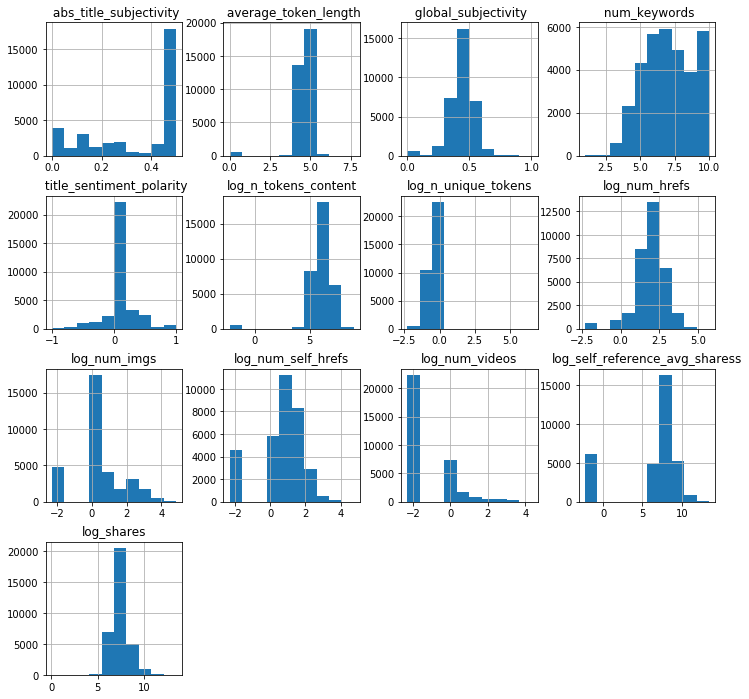

In [19]:
# Most interesting attributes (12 and 1), just the interesting variables

df_clean.hist(figsize=(12,12))

<a id='ExploreJointAttributes'></a>
### 06. Explore Joint Attributes
[Back to top](#BacktoTop)

#### Section Objective:
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

##### Scatter Plotting

###### Multicollinearity


# Maybe we move multi colinearity here say that the fields that are inverses or opposites of each other and a trimmed down correlation plot that shows the fields we removed because they were so closely related they were giving us multi colinearity issues

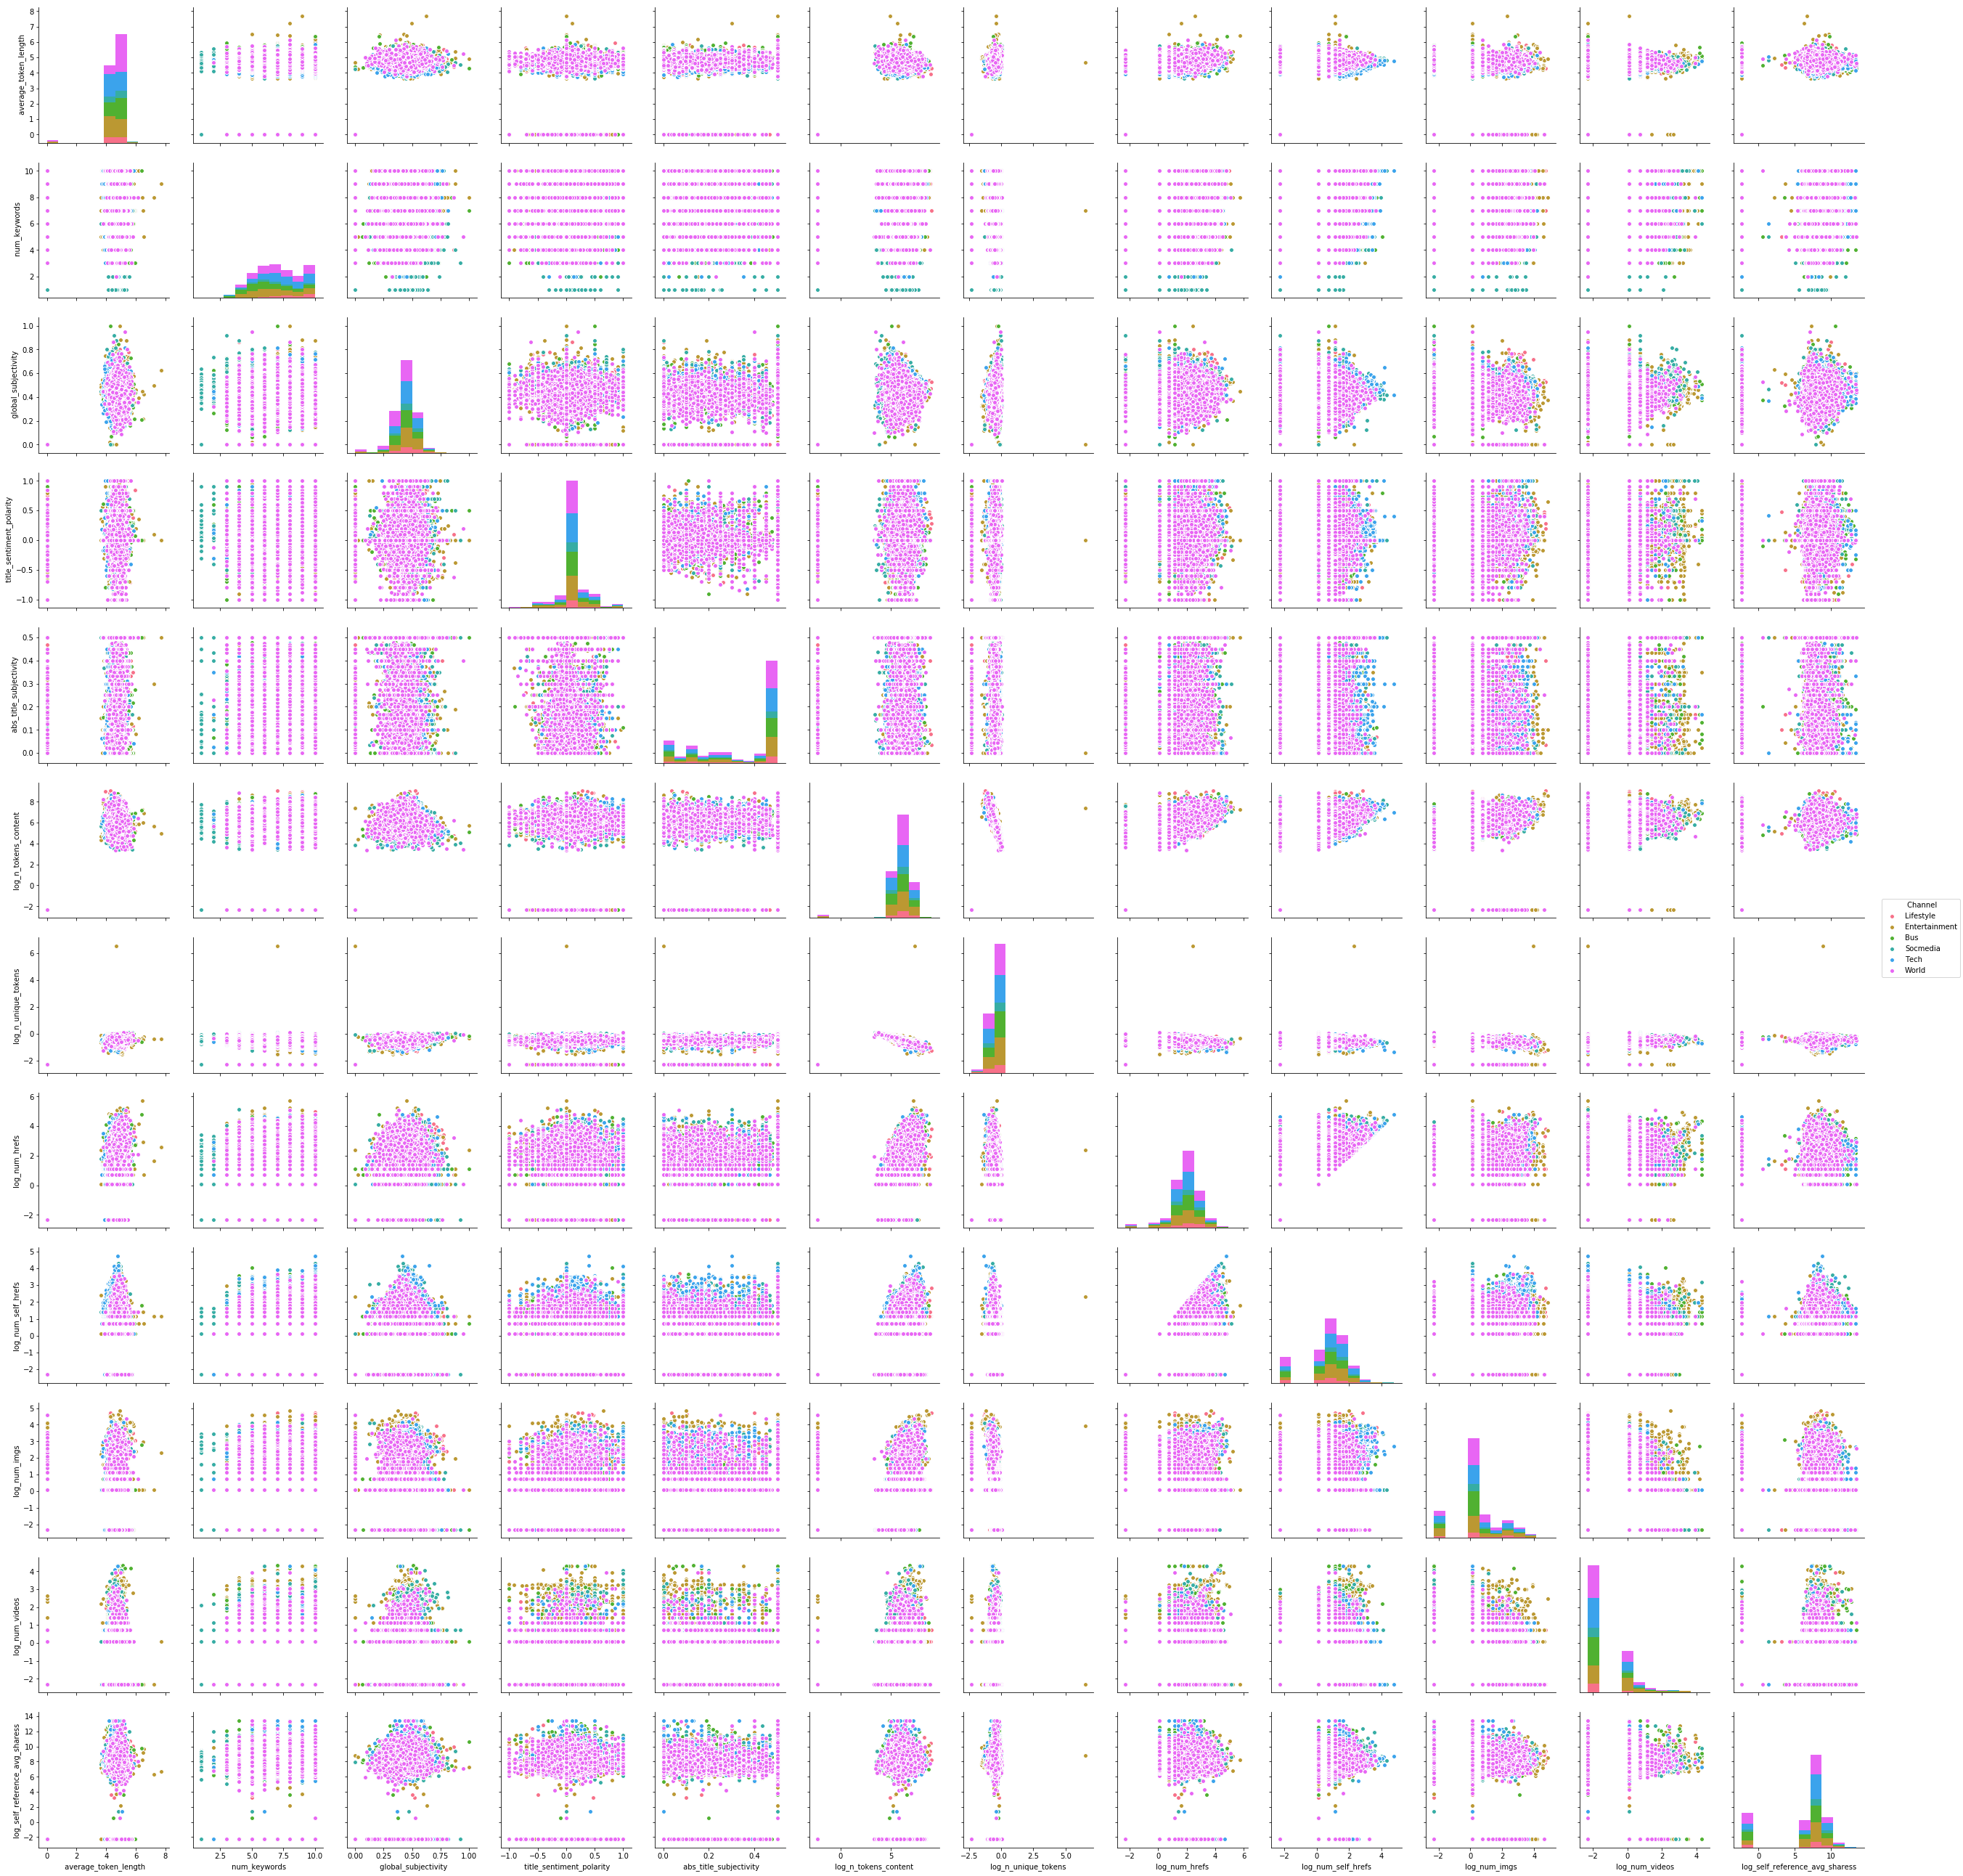

In [20]:
# Pairplot for log transformed variables, as grouped by Channel

sns.pairplot(df, vars=[' average_token_length', ' num_keywords', ' global_subjectivity',' title_sentiment_polarity',
                       ' abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue=" Channel", palette="husl", size=3)

In [21]:
# Pairplot for log transformed variables, as grouped by Weekday

sns.pairplot(df, vars=[' average_token_length', ' num_keywords', ' global_subjectivity',' title_sentiment_polarity',
                       ' abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue=" weekday", palette="husl", size=2)

In [17]:
# Remove some varibles after checking pairplot and keep 12 and target 'log_shares'.

df_clean = df[[' average_token_length', ' num_keywords', ' global_subjectivity',' title_sentiment_polarity',
               ' abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
               'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess', 'log_shares']]

# Recheck linear regression analysis.

clean_y = df_clean.log_shares
clean_X = df_clean.drop(['log_shares'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
clean_X = sm.add_constant(clean_X)
clean_ls_model = sm.OLS(clean_y.astype(float), clean_X.astype(float)).fit()
clean_ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     108.9
Date:                Thu, 13 Sep 2018   Prob (F-statistic):          3.99e-267
Time:                        17:12:18   Log-Likelihood:                -42494.
No. Observations:               33510   AIC:                         8.501e+04
Df Residuals:                   33497   BIC:                         8.512e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.3684      0.082     89.445      0.000       7.207       7.530
 average_token_length             -0.1713      0.018     -9.536      0.000      -0.207      -0.136
 num_keywords                      0.0221      0.002      8.945      0.000       0.017       0.027
 global_subjectivity               0.8297      0.059     14.108      0.000       0.714       0.945
 title_sentiment_polarity          0.1496      0.019      7.737      0.000       0.112       0.188
 abs_title_subjectivity            0.0832      0.026      3.218      0.001       0.033       0.134
log_n_tokens_content              -0.0130      0.007     -1.775      0.076      -0.027       0.001
log_n_unique_tokens               -0.0737      0.033     -2.265      0.024      -0.138      -0.010
log_num_hrefs                      0.0952      0.007     13.577      0.000       0.081       0.109
log_num_self_hrefs                -0.0490      0.006     -8.416      0.000      -0.060      -0.038
log_num_imgs                       0.0084      0.004      2.161      0.031       0.001       0.016
log_num_videos                     0.0230      0.003      6.718      0.000       0.016       0.030
log_self_reference_avg_sharess     0.0300      0.002     16.188      0.000       0.026       0.034
==============================================================================
Omnibus:                     5596.895   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13944.291
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       5.546   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='ExploreAttributesandClass'></a>
### 07. Explore Attributes and Class
[Back to top](#BacktoTop)

#### Section Objective:
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# Do we do the regression of  the 12 attributes we decided keep here to show which ones are relevant to the target variable (shares)


##### Linear Regression
Linear regression is used to identify which variables will be the most effective at predicting target attribute values (number of shares) so that they can be used in the classification model.



In [16]:
# Linear Regression analysis. This part will be moved to # 9. Put here just to show the process to pick interesting variables.

class_y = df.log_shares
class_X = df.drop(['log_shares', ' Channel', ' weekday'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
class_X = sm.add_constant(class_X)
ls_model = sm.OLS(class_y.astype(float), class_X.astype(float)).fit()
ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     85.00
Date:                Thu, 13 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:12:12   Log-Likelihood:                -41360.
No. Observations:               33510   AIC:                         8.281e+04
Df Residuals:                   33465   BIC:                         8.319e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.2988      1.665      4.383      0.000       4.035      10.563
 n_tokens_title                   -0.0004      0.002     -0.177      0.859      -0.005       0.004
 average_token_length             -0.0669      0.021     -3.220      0.001      -0.108      -0.026
 num_keywords                      0.0244      0.003      8.104      0.000       0.018       0.030
 kw_max_max                    -1.765e-07   4.13e-08     -4.275      0.000   -2.57e-07   -9.56e-08
 kw_avg_max                    -2.616e-08   6.48e-08     -0.404      0.686   -1.53e-07    1.01e-07
 kw_min_avg                        0.0003   1.19e-05     25.954      0.000       0.000       0.000
 LDA_00                           -1.4414      2.079     -0.693      0.488      -5.517       2.634
 LDA_01                           -1.8100      2.079     -0.871      0.384      -5.885       2.265
 LDA_02                           -1.7942      2.080     -0.863      0.388      -5.871       2.282
 LDA_03                           -1.7301      2.079     -0.832      0.405      -5.805       2.345
 LDA_04                           -1.4611      2.079     -0.703      0.482      -5.536       2.614
 global_subjectivity               0.4215      0.070      6.048      0.000       0.285       0.558
 global_sentiment_polarity        -0.0956      0.143     -0.668      0.504      -0.376       0.185
 global_rate_positive_words        0.2555      0.603      0.423      0.672      -0.927       1.438
 global_rate_negative_words        0.8708      1.186      0.734      0.463      -1.453       3.195
 rate_positive_words               0.5442      0.483      1.128      0.259      -0.402       1.490
 rate_negative_words               0.3832      0.486      0.788      0.431      -0.570       1.336
 avg_positive_polarity            -0.0585      0.111     -0.525      0.599      -0.277       0.160
 min_positive_polarity            -0.2368      0.097     -2.451      0.014      -0.426      -0.047
 max_positive_polarity            -0.0281      0.034     -0.820      0.412      -0.095       0.039
 avg_negative_polarity            -0.0724      0.099     -0.729      0.466      -0.267       0.122
 min_negative_polarity            -0.0385      0.036     -1.076      0.282      -0.109       0.032
 max_negative_polarity             0.0497      0.087      0.573      0.567      -0.120       0.220
 title_subjectivity                0.0482      0.022      2.169      0.030       0.005       0.092
 title_sentiment_polarity          0.0671      0.021      3.209      0.001       0.026       0.108
 abs_title_subjectivity            0.1272      0.029      4.315      0.000       0.069       0.185
 abs_title_sentiment_polarity      0.0503      0.032      1.558      0.119      -0.013       0.114
log_n_tokens_c

###### Multicollinearity
From the table above it is apprearant that multicollinearity is an issue, it is likely that there are many variables who are dependent on each other but do not help the pveral prediction and are redundant.

To address the multicollinearity pairplots can be used to select attributes that appear to be more


average_token_length
num_keywords
kw_max_max
kw_min_avg
global_subjectivity
title_sentiment_polarity
abs_title_subjectivity
log_n_tokens_content
log_n_unique_tokens
log_num_hrefs
log_num_self_hrefs
log_num_imgs
log_num_videos
log_kw_max_min
log_kw_avg_min
log_kw_min_max
log_kw_avg_avg
log_self_reference_min_shares
log_self_reference_max_shares
log_self_reference_avg_sharess

<a id='NewFeatures'></a>
### 08. New Features
[Back to top](#BacktoTop)

#### Section Objective:
Are there other features that could be added to the data or created from existing features? Which ones?

##### Suggested additions to the data set
1. Break down the number of shares per social media channel
    * This would be intersting because it would allow for analysis to be perfomred to see if an article will be popular on each social media channel. Knowing how the attributes of an article will affect its popularity one each social media platform would allow the publisher to tailor article to the desired platform or even creation social media channel specifc variation of an article to increase pupularity on each channel.
2. Capture the number of hashtags applied to the article
    * Hashtags play a large role in making a topic trend on social media and getting something like an article to go viral. It would make sense to   capture information about hashtags in the data set to see if they 
3. Introduction of time series
    * Capturing the number of shares an article is reciveing of a set of time intervals would allow publishers to see trends and set benchmarks for pupularity of an article. If a pubisher were ablt to see that an article has only gained so much attention at regular intervals it would be helpful for them to know if they need to introduce another article around that same subject or category or if the article is still gaining traction to let it continue to grow before introducing more articles that might impact the popularity of the first.


<a id='ExceptionalWork'></a>
### 09. Exceptional Work
[Back to top](#BacktoTop)

#### Section Objective:
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.


In [22]:
numeric = [c for i,c in enumerate(df.columns) if df.dtypes[i] in [np.float64, np.int64]]
len(numeric)

# Correlation 
cmap = sns.diverging_palette(255, 133, l=60, n=7, as_cmap=True, center="dark")
sns.clustermap(df[numeric].corr(), figsize=(14, 14), cmap=cmap);

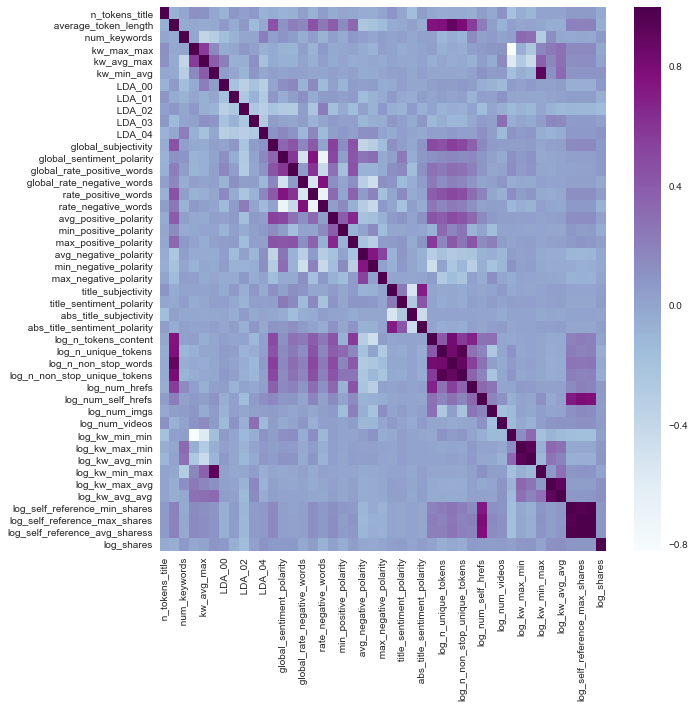

In [23]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

df_heatmap = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap="BuPu")


In [24]:
# Cut log_shares into 2 groups (0, 1)

df_cut = df['log_shares_cut'] = pd.qcut(df['log_shares'], 2, labels = ('unpopular', 'popular'))



In [ ]:
# df['log_shares_cut'] = pd.qcut(df['log_shares'], 3, labels = False)

# pd.qcut(range(5), 3, labels=["good","medium","bad"])

In [25]:
# Get 'log_shares' position
df.columns.get_loc('log_shares')

46

In [26]:
# Drop the above column
df.drop(df.columns[46], axis=1, inplace=True)

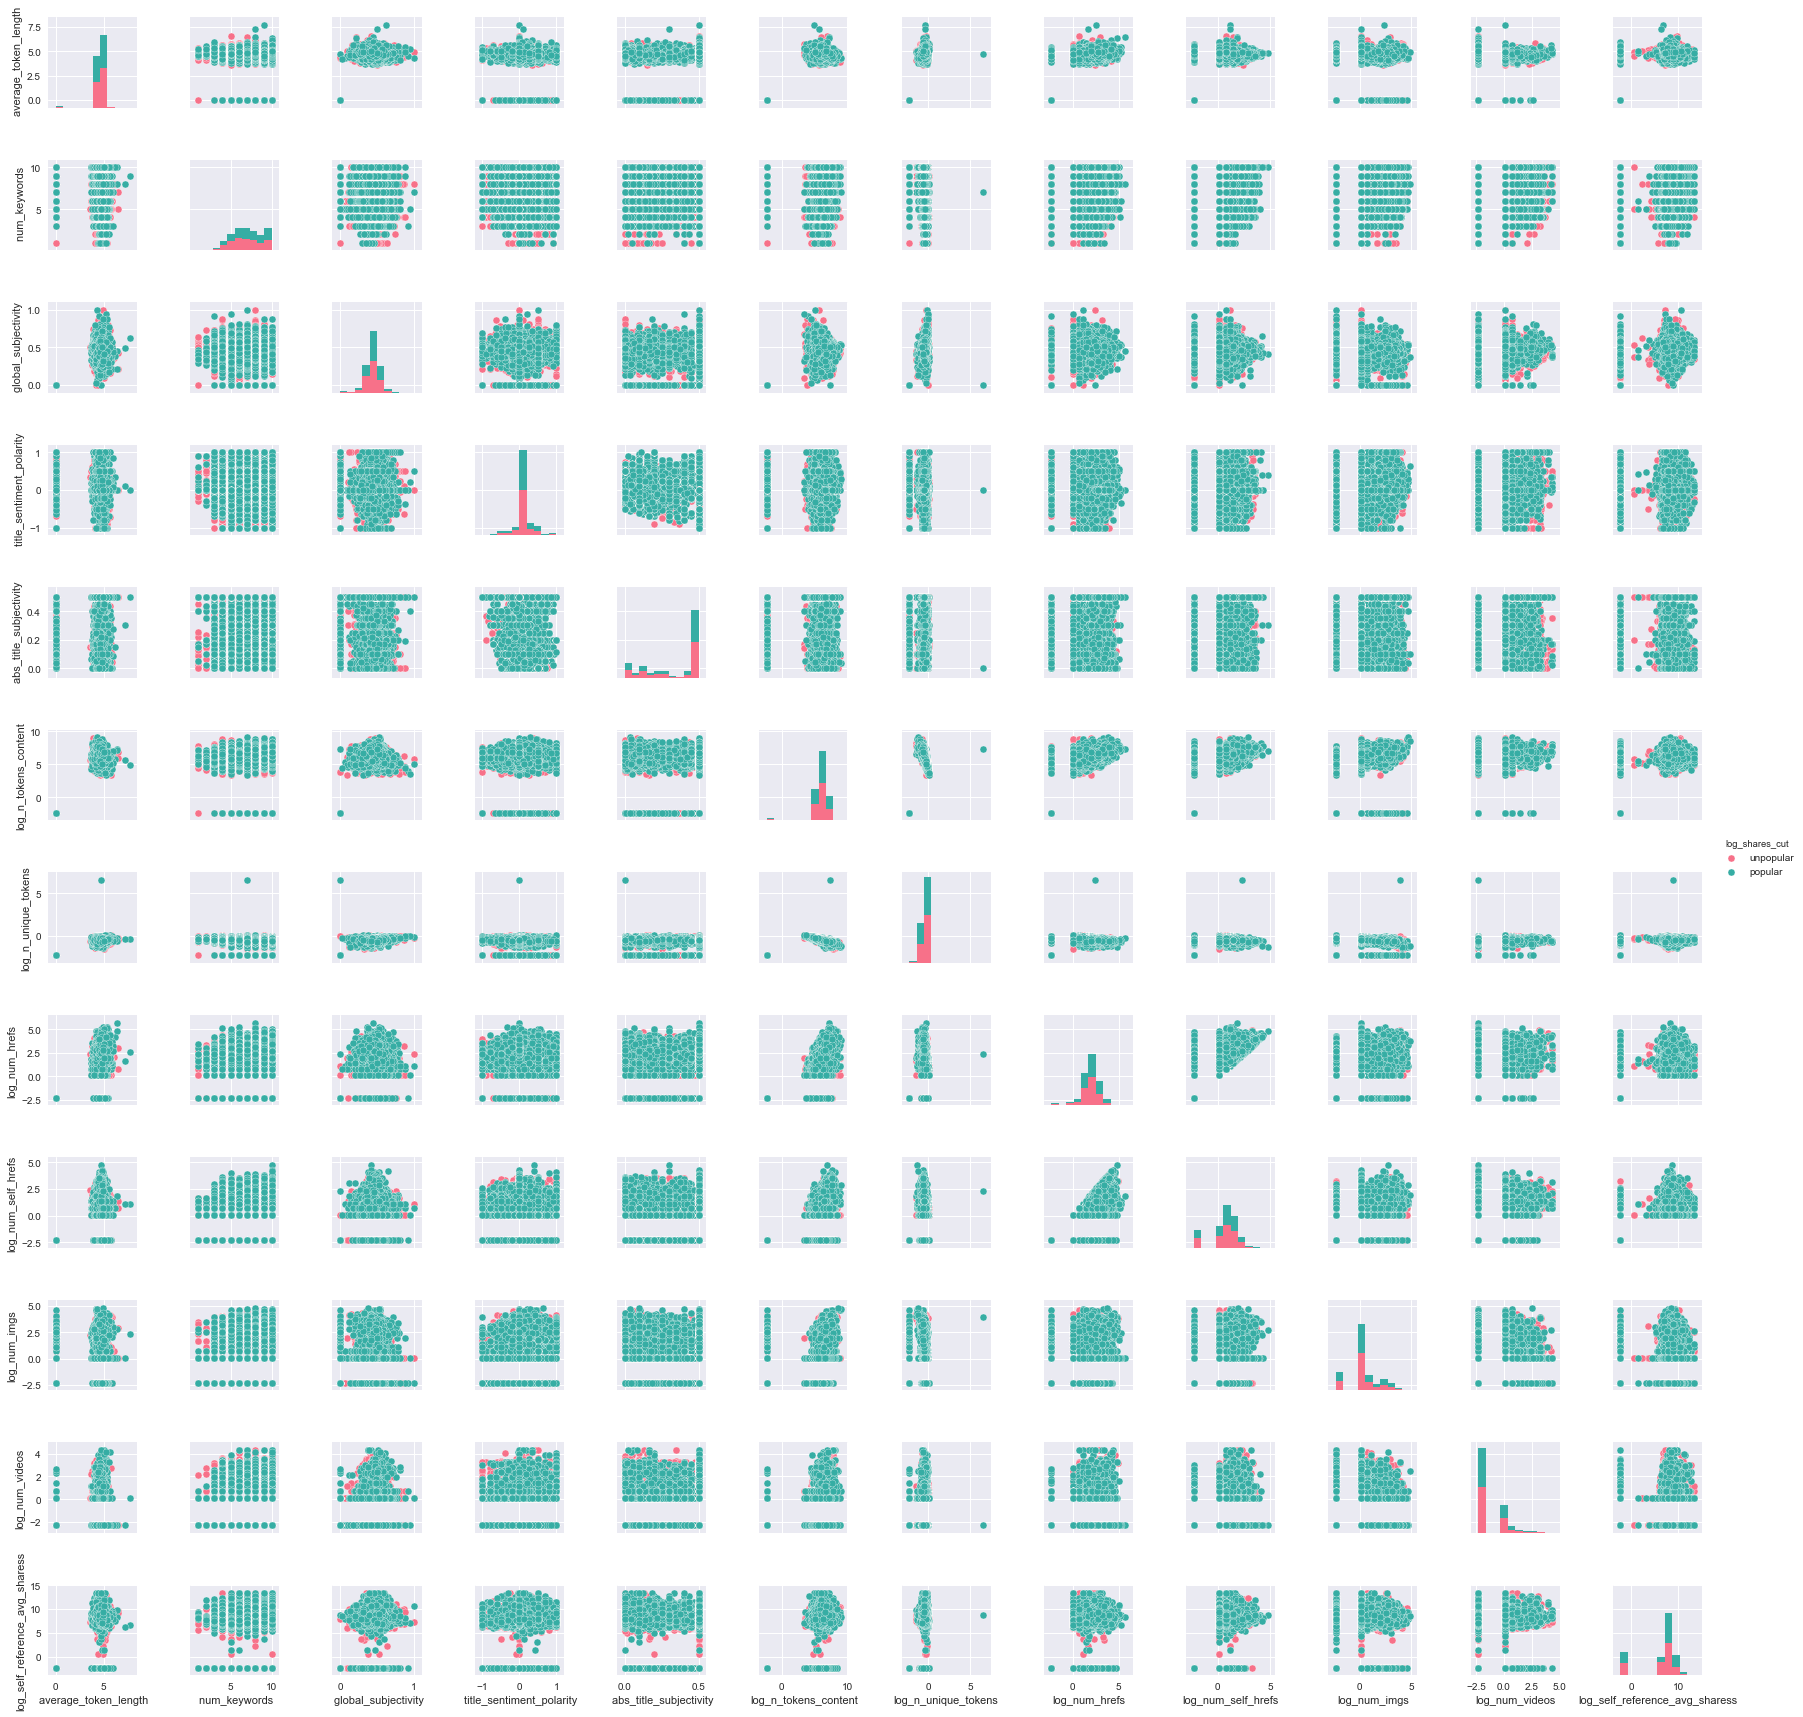

In [27]:
# Samples for pairplot as group by the log_share_cut (0, 1)

sns.pairplot(df, vars = [' average_token_length', ' num_keywords', ' global_subjectivity',' title_sentiment_polarity',
                       ' abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue = "log_shares_cut", palette="husl", size=2)

In [28]:
# Pick log transformed variables, transform and prepare for PCA 

from sklearn.preprocessing import StandardScaler
features = [' average_token_length', ' num_keywords', ' global_subjectivity',' title_sentiment_polarity',
            ' abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
            'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['log_shares_cut']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [29]:
# Try PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [30]:
# Concat two component and prepare to plot

finalDf = pd.concat([principalDf, df[['log_shares_cut']]], axis = 1)
finalDf.head(10)

principal component 1  principal component 2 log_shares_cut
0              -1.684700              -1.913425      unpopular
1               1.010819               2.862638      unpopular
2               0.416002               0.751330        popular
3               1.469637               2.239519      unpopular
4              -0.155334               1.734597      unpopular
5              -0.315230              -0.641018      unpopular
6              -1.780766              -1.912482      unpopular
7               0.893568               2.773147      unpopular
8               0.090845              -1.091994        popular
9               0.644319               2.873947      unpopular

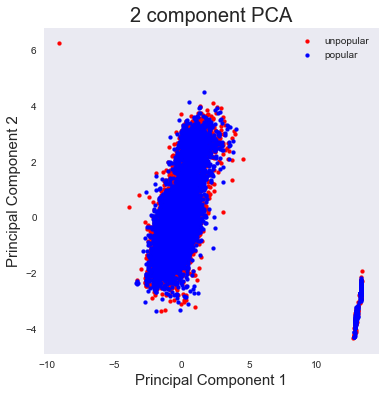

In [31]:
# Plot 2 component PCA

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
log_shares_cuts = ['unpopular', 'popular'] # 0 = unpopular, 1 = popular
colors = ['r', 'b']

for log_shares_cut, color in zip(log_shares_cuts, colors):
    indicesToKeep = finalDf['log_shares_cut'] == log_shares_cut
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
ax.legend(log_shares_cuts)
ax.grid()